#### Resouces : 
- https://www.kaggle.com/datasets/swapnilpanda/heart-sound-database  
After rescearch and asking doctors we found that this dataset belong to lung sound not heart sound. Ref: https://www.kaggle.com/code/israaelmorsy/lung-sound-classification/notebook
- https://www.kaggle.com/datasets/vbookshelf/respiratory-sound-database
- https://data.mendeley.com/datasets/jwyy9np4gv/3

#####
- conda create -n myenv
- conda activate myenv
- conda install -c anaconda seaborn
- conda install -c conda-forge matplotlib
- conda install -c conda-forge librosa
- conda install -c anaconda scikit-learn
- conda install -c conda-forge tensorflow
- conda install -c anaconda pandas
- conda install -c anaconda numpy

#### I will find more data and update soon.

In [1]:
from IPython.display import display, HTML, clear_output
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import os
import seaborn as sns
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import wave
import time

In [3]:
np.random.seed(123)

## If error :
#### No module named 'numba.decorators'
- conda install -c numba numba
- conda install -c conda-forge librosa

#### cannot load library libsndfile64bit.dll 
- pip uninstall soundfile
- pip install soundfile

## Data from Kaggle - 1

In [4]:
audio_dir = 'Respiratory_Sound_Database/audio_and_txt_files'
wav_files = sorted([os.path.join(audio_dir, f) for f in os.listdir(audio_dir) if f.endswith('.wav')])

In [5]:
target_length = 22050 * 5
audio_data_list = []
n_mfcc=20
n_mels = 128

In [6]:
for file_path in wav_files:
    samples, sr = librosa.load(file_path)

    if len(samples) < target_length:
        samples = np.pad(samples, (0, target_length - len(samples)), 'constant')
    else:
        samples = samples[:target_length]

    audio_data_list.append(samples)
len(audio_data_list)

920

In [7]:
y_train = pd.read_csv("Respiratory_Sound_Database/patient_diagnosis.csv" ,  header=None)
y_train = y_train.rename(columns={0: "id", 1: "type"})
y_train['type'].value_counts()

COPD              64
Healthy           26
URTI              14
Bronchiectasis     7
Pneumonia          6
Bronchiolitis      6
LRTI               2
Asthma             1
Name: type, dtype: int64

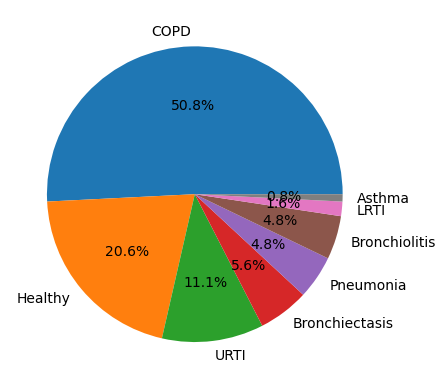

In [8]:
counts =y_train["type"].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.show()

In [9]:
y_train.loc[y_train['type'] != 'Healthy', 'type'] = 'Unhealthy'
y_train

,id,type
0,101,Unhealthy
1,102,Healthy
2,103,Unhealthy
3,104,Unhealthy
4,105,Unhealthy
...,...,...
121,222,Unhealthy
122,223,Unhealthy
123,224,Healthy
124,225,Healthy


In [10]:
y_train["type"].value_counts()

Unhealthy    100
Healthy       26
Name: type, dtype: int64

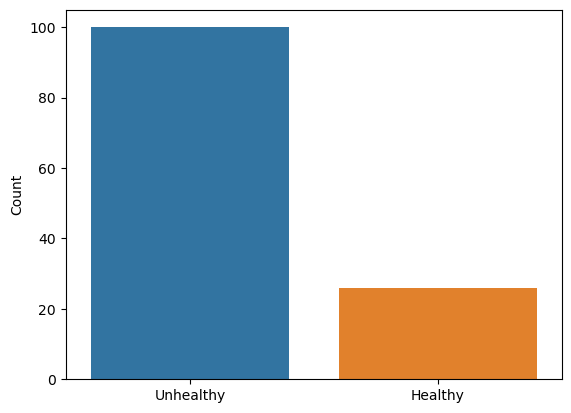

In [11]:
counts =y_train["type"].value_counts()
sns.barplot(x= counts.index, y= counts.values)
plt.ylabel('Count')
plt.show()

In [12]:
patient_ids = [int(f.split("_")[0]) for f in os.listdir(audio_dir) if f.endswith(".wav")]
patient_ids.sort()
new_y_train = pd.DataFrame({'id': patient_ids})
for i, pid in enumerate(patient_ids):
    match = y_train['id'] == pid
    if match.any():
        new_y_train.at[i, 'type'] = y_train[match]['type'].values[0]
    else:
        new_y_train.at[i, 'type'] = 'Unknown'
new_y_train

,id,type
0,101,Unhealthy
1,101,Unhealthy
2,102,Healthy
3,103,Unhealthy
4,104,Unhealthy
...,...,...
915,224,Healthy
916,225,Healthy
917,226,Unhealthy
918,226,Unhealthy


In [13]:
new_y_train["type"].value_counts()

Unhealthy    885
Healthy       35
Name: type, dtype: int64

In [14]:
y_train = new_y_train
y_train = y_train.drop("id", axis=1)
y_train

,type
0,Unhealthy
1,Unhealthy
2,Healthy
3,Unhealthy
4,Unhealthy
...,...
915,Healthy
916,Healthy
917,Unhealthy
918,Unhealthy


In [15]:
y_train['type'].value_counts()

Unhealthy    885
Healthy       35
Name: type, dtype: int64

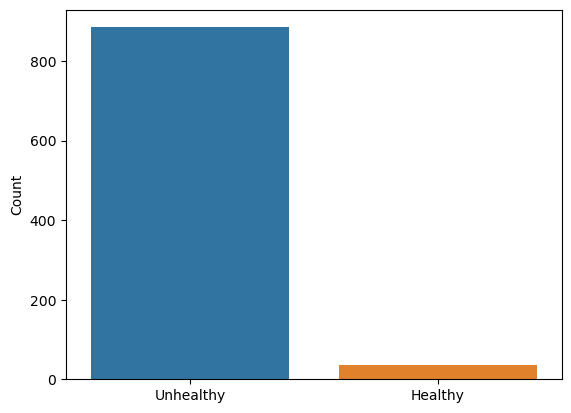

In [16]:
counts =y_train['type'].value_counts()
sns.barplot(x= counts.index, y= counts.values)
plt.ylabel('Count')
plt.show()

## Data from Kaggle - 2

### Healthy Data

In [17]:
# assert False, "Stopping the execution here"

In [18]:
audio_dir_1 = 'heart_sound/train/healthy'
audio_dir_2 = 'heart_sound/val/healthy'

wav_files_1 = sorted([os.path.join(audio_dir_1, f) for f in os.listdir(audio_dir_1) if f.endswith('.wav')])
wav_files_2 = sorted([os.path.join(audio_dir_2, f) for f in os.listdir(audio_dir_2) if f.endswith('.wav')])

In [19]:
count = 0
for file_path in wav_files_1 + wav_files_2:
    samples, sr = librosa.load(file_path)

    if len(samples) < target_length:
        samples = np.pad(samples, (0, target_length - len(samples)), 'constant')
    else:
        samples = samples[:target_length]
    audio_data_list.append(samples)
    count += 1
len(audio_data_list)

3645

In [20]:
y_2 = pd.DataFrame({'type': ['Healthy'] * count})
y_2

,type
0,Healthy
1,Healthy
2,Healthy
3,Healthy
4,Healthy
...,...
2720,Healthy
2721,Healthy
2722,Healthy
2723,Healthy


In [21]:
y_train

,type
0,Unhealthy
1,Unhealthy
2,Healthy
3,Unhealthy
4,Unhealthy
...,...
915,Healthy
916,Healthy
917,Unhealthy
918,Unhealthy


In [22]:
y_train = pd.concat([y_train, y_2], ignore_index=False)
y_train.shape

(3645, 1)

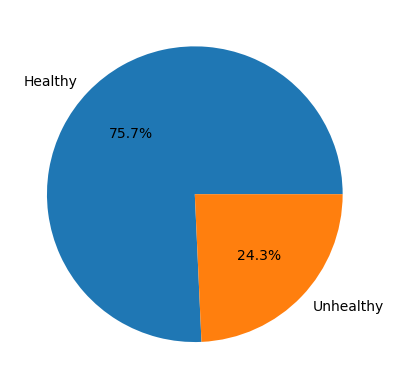

In [23]:
counts = y_train["type"].value_counts()
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.show()

### Unhealthy Data

In [24]:
audio_dir_3 = 'heart_sound/train/unhealthy'
audio_dir_4 = 'heart_sound/val/unhealthy'

wav_files_3 = sorted([os.path.join(audio_dir_3, f) for f in os.listdir(audio_dir_3) if f.endswith('.wav')])
wav_files_4 = sorted([os.path.join(audio_dir_4, f) for f in os.listdir(audio_dir_4) if f.endswith('.wav')])

In [25]:
directory = audio_dir_3
count = 0

for file in os.listdir(directory):
    if file.endswith(".wav"):
        count += 1

directory = audio_dir_4

for file in os.listdir(directory):
    if file.endswith(".wav"):
        count += 1
print(f"Number of .wav files in directory: {count}")

Number of .wav files in directory: 816


In [26]:
for file_path in wav_files_3 + wav_files_4:
    samples, sr = librosa.load(file_path)
        # Trim the audio file to remove the dead air
    samples, _ = librosa.effects.trim(samples)
    if len(samples) < target_length:
        samples = np.pad(samples, (0, target_length - len(samples)), 'constant')
    else:
        samples = samples[:target_length]
    audio_data_list.append(samples)
len(audio_data_list)

4461

In [27]:
y_3 = pd.DataFrame({'type': ['Unhealthy'] * count})
y_3

,type
0,Unhealthy
1,Unhealthy
2,Unhealthy
3,Unhealthy
4,Unhealthy
...,...
811,Unhealthy
812,Unhealthy
813,Unhealthy
814,Unhealthy


In [28]:
y_train = pd.concat([y_train, y_3], ignore_index=False)
y_train.shape

(4461, 1)

In [29]:
y_train.value_counts()

type     
Healthy      2760
Unhealthy    1701
dtype: int64

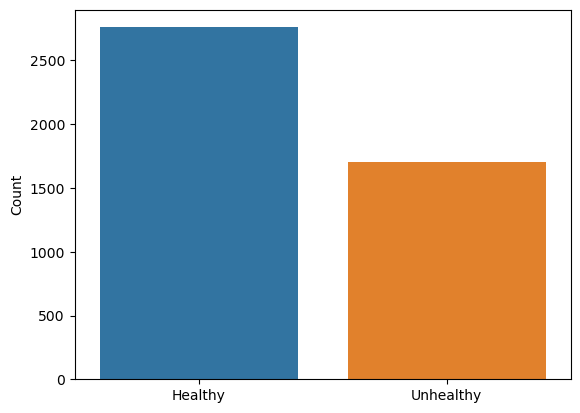

In [30]:
# count the values in the 'Category' column
counts =y_train['type'].value_counts()
sns.barplot(x= counts.index, y= counts.values)
plt.ylabel('Count')
plt.show()

## Data from data.mendeley - 3

In [31]:
audio_dir_5 = 'jwyy9np4gv-3/Audio Files'
wav_files_5 = sorted([os.path.join(audio_dir_5, f) for f in os.listdir(audio_dir_5) if f.endswith('.wav')])

In [32]:
len(audio_data_list)

4461

In [33]:
for file_path in wav_files_5:
    samples, sr = librosa.load(file_path)

    if len(samples) < target_length:
        samples = np.pad(samples, (0, target_length - len(samples)), 'constant')
    else:
        samples = samples[:target_length]
    audio_data_list.append(samples)
len(audio_data_list)

4797

In [34]:
data = []

for file in wav_files_5:
    # Split the file name to get the data after "_"
    data_after_underscore = file.split('_')[1]
    # Remove the file extension
    data_after_underscore = data_after_underscore.split('.')[0]
    
    data_after_underscore = data_after_underscore.split(",")[0]
        
    data.append(data_after_underscore)

# Create a DataFrame from the data
y_4= pd.concat([pd.DataFrame(data, columns=['type'])])

# Print the DataFrame
y_4.value_counts()

type                          
N                                 105
Asthma                             51
asthma                             45
heart failure                      45
COPD                               24
pneumonia                          15
Lung Fibrosis                      12
BRON                                9
Heart Failure                       9
Heart Failure + COPD                6
Plueral Effusion                    6
Asthma and lung fibrosis            3
Heart Failure + Lung Fibrosis       3
copd                                3
dtype: int64

In [35]:
# y_4.shape

In [36]:
y_4.loc[y_4['type'] == 'N', 'type'] = 'Healthy'
y_4.loc[y_4['type'] != 'Healthy', 'type'] = 'Unhealthy'
y_4.value_counts()

type     
Unhealthy    231
Healthy      105
dtype: int64

In [37]:
y_train = pd.concat([y_train, y_4], ignore_index=False)
y_train.shape

(4797, 1)

In [38]:
y_train['type'].value_counts()

Healthy      2865
Unhealthy    1932
Name: type, dtype: int64

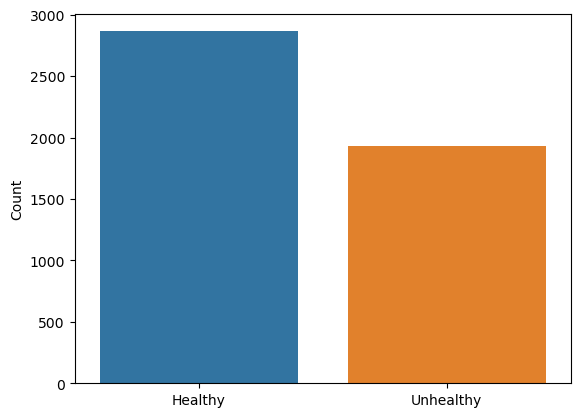

In [39]:
# count the values in the 'Category' column
counts =y_train['type'].value_counts()
sns.barplot(x= counts.index, y= counts.values)
plt.ylabel('Count')
plt.show()

In [40]:
y_train["type"] = np.where(y_train["type"] == "Healthy", 0, 1)
y_train = to_categorical(y_train, 2)
y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [41]:
def mfccs_convert(audio_data_list):
    mfccs = []
    for audio_data in audio_data_list:
        mfcc = librosa.feature.mfcc(y=audio_data , n_mfcc=n_mfcc , n_mels = n_mels)
        mfccs.append(mfcc)
    data = np.array(mfccs)
    data = np.expand_dims(data, axis=-1)
    return data

In [42]:
def time_shift(audio_data_list, shift_seconds):
    # Determine the number of samples to shift by
    shift_samples = int(shift_seconds * 22050)

    # Create an empty list to store the shifted audio data
    shifted_audio_data_list = []

    # Loop through the audio data and shift each sample by the specified number of samples
    for audio_data in audio_data_list:
        shifted_audio_data = np.zeros_like(audio_data)
        if shift_samples > 0:
            shifted_audio_data[shift_samples:] = audio_data[:-shift_samples]
        elif shift_samples < 0:
            shifted_audio_data[:shift_samples] = audio_data[-shift_samples:]
        else:
            shifted_audio_data = audio_data
        shifted_audio_data_list.append(shifted_audio_data)

    return shifted_audio_data_list


In [43]:
def add_noise(audio_data_list, noise_level=0.005):
    for i, audio_data in enumerate(audio_data_list):
        # Add Gaussian noise to the audio data
        noise = np.random.normal(0, noise_level, len(audio_data))
        audio_data += noise
        audio_data_list[i] = audio_data
    return audio_data_list

In [44]:
len(audio_data_list) , y_train.shape

(4797, (4797, 2))

In [46]:
X_train, X_test , y_train , y_test = train_test_split(audio_data_list, y_train , test_size=0.18, random_state=42, shuffle=True)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train , test_size=0.2, random_state=42, shuffle=True)

In [47]:
len(X_train) , y_train.shape , len(X_val) , y_val.shape , len(X_test) , y_test.shape

(3146, (3146, 2), 787, (787, 2), 864, (864, 2))

In [48]:
X_train_reset1= X_train.copy()
y_train_reset1 = y_train.copy()

In [49]:
X_train = X_train_reset1.copy()
y_train = y_train_reset1.copy()

In [50]:
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()


In [51]:

# #add noise
# X_train_aug = add_noise(X_train_copy.copy())
# y_train_aug = y_train_copy
# X_train_copy = X_train.copy()
# y_train_copy = y_train.copy()
# X_train.extend(X_train_aug)
# y_train = np.concatenate((y_train, y_train_aug))
# # y_train = pd.concat([y_train, y_train_aug], ignore_index=False)

# plt.plot(X_train_aug[222]);
# plt.title('Signal');
# plt.xlabel('Time (samples)');
# plt.ylabel('Amplitude');




In [52]:
# plt.plot(X_train_copy[222]);
# plt.title('Signal');
# plt.xlabel('Time (samples)');
# plt.ylabel('Amplitude');

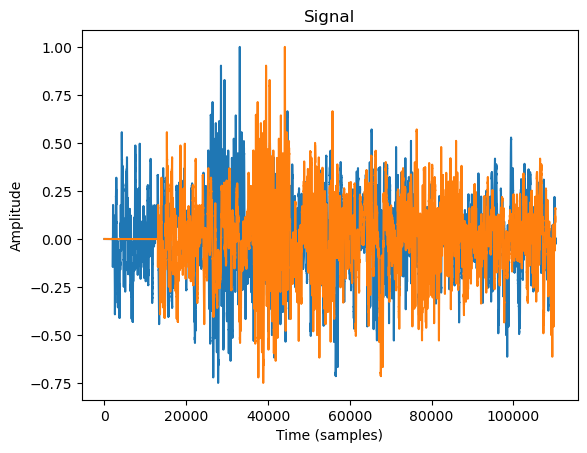

In [53]:
plt.plot(X_train_copy[10]);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

#time shift
X_train_aug = time_shift(X_train_copy.copy(),0.5)
y_train_aug = y_train_copy
X_train.extend(X_train_aug)
y_train = np.concatenate((y_train, y_train_aug))
# y_train = pd.concat([y_train, y_train_aug], ignore_index=False)

plt.plot(X_train_aug[10]);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

In [54]:
len(X_train) , y_train.shape

(6292, (6292, 2))

In [55]:
# assert False, "Stopping the execution here"

In [56]:
start = time.time()
X_train = mfccs_convert(X_train)
end = time.time()
print("Use : ", end - start, "seconds")

Use :  24.1438992023468 seconds


In [57]:
start = time.time()
X_val =mfccs_convert(X_val)
end = time.time()
print("Use : ", end - start, "seconds")

Use :  3.2869839668273926 seconds


In [58]:
start = time.time()
X_test = mfccs_convert(X_test)
end = time.time()
print("Use : ", end - start, "seconds")

Use :  3.5335497856140137 seconds


In [59]:
indices = np.random.permutation(len(X_train))

# Shuffle arrays using random indices
X_train = X_train[indices]
y_train = y_train[indices]

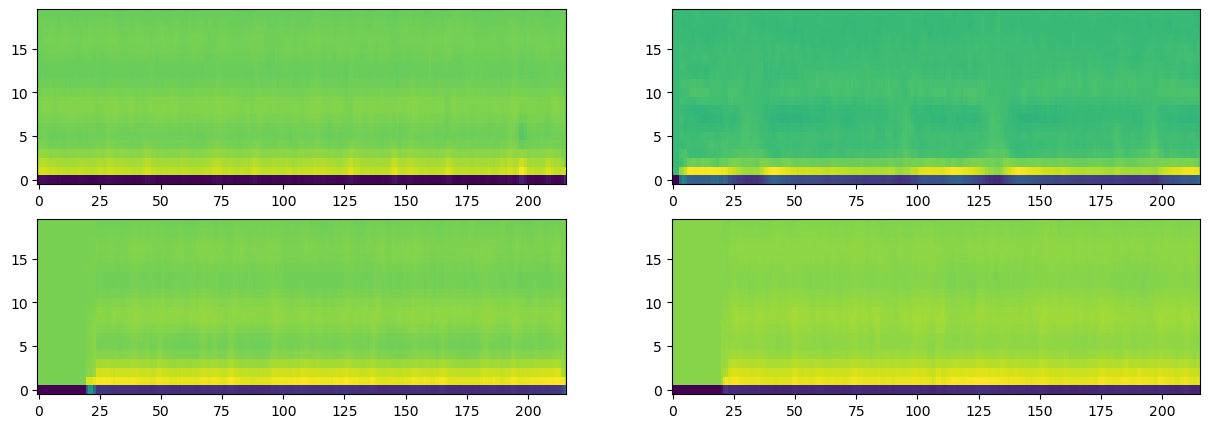

In [60]:
# plot some MFCCs
fig, axs = plt.subplots(2, 2 , figsize=(15, 5))
axs[0, 0].imshow(X_train[111], interpolation='nearest', origin='lower', aspect='auto')
axs[0, 1].imshow(X_train[222], interpolation='nearest', origin='lower', aspect='auto')
axs[1, 0].imshow(X_train[333], interpolation='nearest', origin='lower', aspect='auto')
axs[1, 1].imshow(X_train[444], interpolation='nearest', origin='lower', aspect='auto')
plt.show()

In [61]:
X_train_reset2 = X_train.copy()
y_train_reset2 = y_train.copy()

In [62]:
X_train = X_train_reset2.copy()
y_train = y_train_reset2.copy()

In [63]:
len(X_train) , y_train.shape

(6292, (6292, 2))

### Stop

In [64]:
# assert False, "Stopping the execution here"

In [65]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout , BatchNormalization , GlobalAveragePooling2D
from sklearn.metrics import classification_report , confusion_matrix ,ConfusionMatrixDisplay

In [66]:
X_train.shape , y_train.shape , X_val.shape , y_val.shape ,X_test.shape , y_test.shape

((6292, 20, 216, 1),
 (6292, 2),
 (787, 20, 216, 1),
 (787, 2),
 (864, 20, 216, 1),
 (864, 2))

In [103]:

model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2],1),padding='same'))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# model.add(GlobalAveragePooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 20, 216, 32)       320       
                                                                 
 conv2d_13 (Conv2D)          (None, 18, 214, 32)       9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 9, 107, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 9, 107, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 105, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 5, 103, 64)        36928     
                                                      

In [104]:
# model = Sequential()
# model.add(Conv2D(16, kernel_size=2, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2],1),padding='same'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.2))

# model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.2))

# model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.2))

# model.add(GlobalAveragePooling2D())

# model.add(Dense(2, activation='softmax')) 
# model.summary()

In [105]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [106]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5
99/99 [==============================] - 13s 124ms/step - loss: 1.1689 - accuracy: 0.6832 - val_loss: 0.5081 - val_accuracy: 0.7687
Epoch 2/5
99/99 [==============================] - 12s 122ms/step - loss: 0.4632 - accuracy: 0.7667 - val_loss: 0.4471 - val_accuracy: 0.7789
Epoch 3/5
99/99 [==============================] - 12s 122ms/step - loss: 0.4147 - accuracy: 0.7875 - val_loss: 0.4334 - val_accuracy: 0.8018
Epoch 4/5
99/99 [==============================] - 12s 122ms/step - loss: 0.3675 - accuracy: 0.8215 - val_loss: 0.3208 - val_accuracy: 0.8412
Epoch 5/5
99/99 [==============================] - 12s 124ms/step - loss: 0.3514 - accuracy: 0.8304 - val_loss: 0.3107 - val_accuracy: 0.8640


In [107]:
score = model.evaluate(X_test,y_test)
print("accuracy : " + str(score[1] * 100) )

27/27 [==============================] - 1s 19ms/step - loss: 0.3099 - accuracy: 0.8576
accuracy : 85.76388955116272


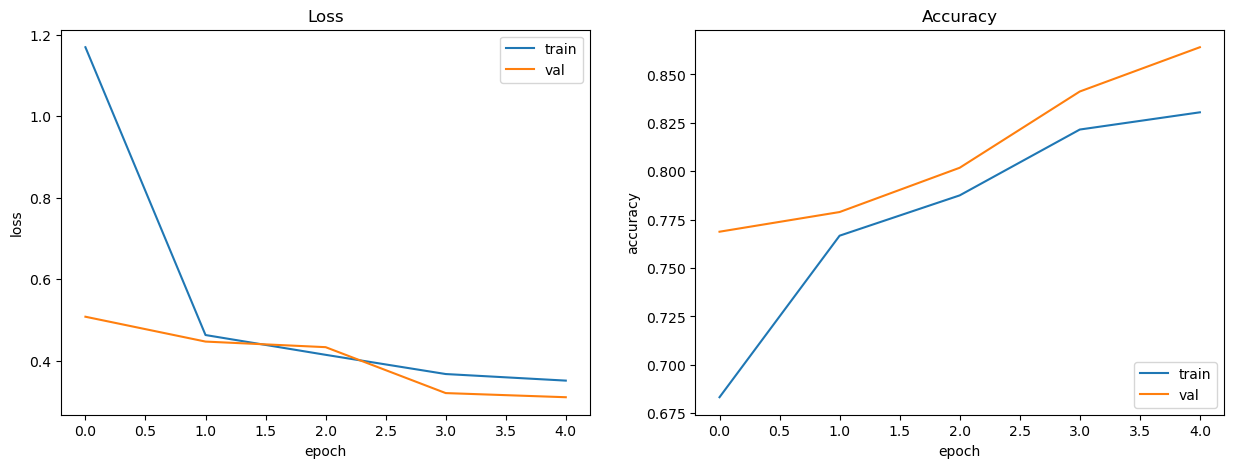

In [108]:
fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(15,5))

ax1.set_title('Loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'val'], loc='upper right')


ax2.set_title('Accuracy')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.legend(['train', 'val'], loc='lower right')

27/27 [==============================] - 1s 18ms/step


[Text(0.5, 0, 'Predictions'), Text(0, 0.5, 'Actuals')]

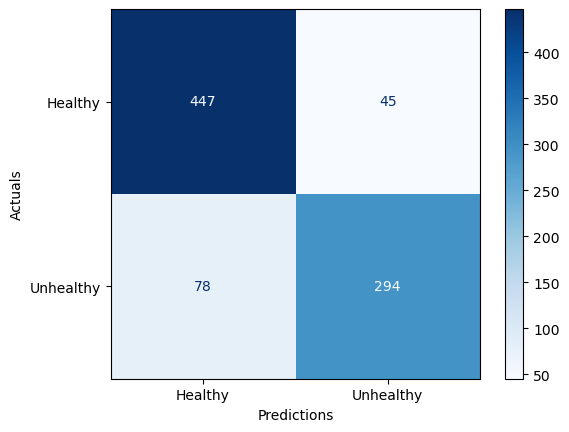

In [109]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
cm = confusion_matrix(y_true, y_pred_classes) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Healthy" , "Unhealthy"])
disp.plot(cmap='Blues')
disp.ax_.set(xlabel='Predictions', ylabel='Actuals')

In [110]:
print(classification_report(y_true , y_pred_classes, target_names=["Healthy" , "Unhealthy"]))

              precision    recall  f1-score   support

     Healthy       0.85      0.91      0.88       492
   Unhealthy       0.87      0.79      0.83       372

    accuracy                           0.86       864
   macro avg       0.86      0.85      0.85       864
weighted avg       0.86      0.86      0.86       864



#### Let's try with Data from youtube video

In [111]:
audio_dir_yt_1 = 'LungDataset/Healthy'
audio_dir_yt_2 = 'LungDataset/Unhealthy'

wav_files_yt_1 = sorted([os.path.join(audio_dir_yt_1, f) for f in os.listdir(audio_dir_yt_1) if f.endswith('.wav')])
wav_files_yt_2 = sorted([os.path.join(audio_dir_yt_2, f) for f in os.listdir(audio_dir_yt_2) if f.endswith('.wav')])

In [112]:
# Set the number of Mel frequency bins
n_mels = 128

# List to hold all the mel spectrograms
all_mfccs = []
data_predict = []
i=0
# Iterate over all the audio files
for wav_file in wav_files_yt_1 + wav_files_yt_2:
    # Load the audio file
    samples, sample_rate = librosa.load(wav_file)

    # Trim the audio file to remove the dead air
    samples, _ = librosa.effects.trim(samples)

    # Pad or truncate the audio file to the target length
    if len(samples) < target_length:
        samples = np.pad(samples, (0, target_length - len(samples)), 'constant')
    else:
        samples = samples[:target_length]

    # Compute the Mel spectrogram
    mfccs = librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=n_mfcc, n_mels=n_mels)

    # Append the Mel spectrogram to the list
    all_mfccs.append(mfccs)

    data_predict.append([wav_file.split("/")[2]]) #Macos
#     data_predict.append([wav_file.split("\\")[1]]) #Windows
    if wav_file in wav_files_yt_1:
        data_predict[i].append("Healthy")
    else : 
        data_predict[i].append("Unhealthy")
    i += 1

# Convert the list to a numpy array and add a channel dimension
X_yt = np.array(all_mfccs)
X_yt = np.expand_dims(X_yt, axis=-1)

# Print the shape of the numpy array
print(X_yt.shape)

(19, 20, 216, 1)


In [113]:
y_pred = model.predict(X_yt)
y_pred_classes = np.argmax(y_pred, axis = 1)
i = 0
for pred in y_pred_classes:
    if pred == 0:
        data_predict[i].append("Healthy")
    else:
        data_predict[i].append("Unhealthy")
    i += 1
data_predict

1/1 [==============================] - 0s 43ms/step


[['NormalBreathSound.wav', 'Healthy', 'Unhealthy'],
 ['NormalBronchial.wav', 'Healthy', 'Healthy'],
 ['NormalBronchialBreathSounds2.wav', 'Healthy', 'Healthy'],
 ['NormalBronchovesicular.wav', 'Healthy', 'Healthy'],
 ['NormalLungSound.wav', 'Healthy', 'Healthy'],
 ['NormalVesicular.wav', 'Healthy', 'Healthy'],
 ['NormalVesicularBreathSounds.wav', 'Healthy', 'Healthy'],
 ['NormalVesicularBreathSounds2.wav', 'Healthy', 'Healthy'],
 ['Asthma.wav', 'Unhealthy', 'Unhealthy'],
 ['Bronchiectasis.wav', 'Unhealthy', 'Unhealthy'],
 ['COPD.wav', 'Unhealthy', 'Unhealthy'],
 ['CracklesCoarse.wav', 'Unhealthy', 'Healthy'],
 ['CracklesFine.wav', 'Unhealthy', 'Unhealthy'],
 ['DiminishedBreathSounds.wav', 'Unhealthy', 'Healthy'],
 ['ExpiratoryWheezing.wav', 'Unhealthy', 'Healthy'],
 ['PleuralRub.wav', 'Unhealthy', 'Unhealthy'],
 ['Pneumonia.wav', 'Unhealthy', 'Healthy'],
 ['Ronchi.wav', 'Unhealthy', 'Healthy'],
 ['Stridor.wav', 'Unhealthy', 'Unhealthy']]

In [114]:
predict_table=pd.DataFrame(data_predict, columns=['file_name','true','predict'])
predict_table

,file_name,true,predict
0,NormalBreathSound.wav,Healthy,Unhealthy
1,NormalBronchial.wav,Healthy,Healthy
2,NormalBronchialBreathSounds2.wav,Healthy,Healthy
3,NormalBronchovesicular.wav,Healthy,Healthy
4,NormalLungSound.wav,Healthy,Healthy
5,NormalVesicular.wav,Healthy,Healthy
6,NormalVesicularBreathSounds.wav,Healthy,Healthy
7,NormalVesicularBreathSounds2.wav,Healthy,Healthy
8,Asthma.wav,Unhealthy,Unhealthy
9,Bronchiectasis.wav,Unhealthy,Unhealthy
